<a href="https://colab.research.google.com/github/ashraf-abdalghani/mycolab/blob/main/Twitter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. تحميل البيانات وتجهيز البيئة:

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import zipfile
import os


In [2]:
!unzip /content/datafile.zip -d /content/

Archive:  /content/datafile.zip
  inflating: /content/training.1600000.processed.noemoticon.csv  


In [3]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=columns)

# عرض عينة عشوائية
data.sample(3)

,target,ids,date,flag,user,text
374529,0,2051257749,Fri Jun 05 21:22:10 PDT 2009,NO_QUERY,Paige_Evans,@amy2011 im so scared... i think i may have ju...
111255,0,1825076301,Sun May 17 04:14:22 PDT 2009,NO_QUERY,sampan22,@SARGE_PAULNE oooh get it- another loopy! can...
465418,0,2175346936,Mon Jun 15 00:44:07 PDT 2009,NO_QUERY,LoJT,missed the final nba game. oh well. at least ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
round(data.describe())

,target,ids
count,1600000.0,1.600000e+06
mean,2.0,1.998818e+09
std,2.0,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,2.0,2.002102e+09
75%,4.0,2.177059e+09
max,4.0,2.329206e+09


# 2. تنظيف النصوص:

In [6]:
def clean_text(text):
    # إزالة الروابط
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # إزالة علامات الترقيم والأرقام
    text = re.sub(r'[^\w\s]', '', text)
    # تحويل النص إلى حروف صغيرة
    text = text.lower()
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

In [7]:
data.head()

,target,ids,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot a thats a bummer you shoulda got...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


# 3. تحليل المشاعر (Sentiment Analysis):

In [8]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

# توزيع المشاعر
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    685524
neutral     570514
negative    343962
Name: count, dtype: int64


# 4. استخراج الكلمات الأكثر تكرارًا:

In [9]:
import nltk
nltk.download('all')

print(f'the path : {nltk.data.path}')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

the path : ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [10]:

# تحميل stopwords (كلمات التوقف الشائعة مثل "the", "and")
nltk.download('stopwords')
nltk.download('punkt') # Download the punkt tokenizer data
stop_words = set(stopwords.words('english'))

# فلترة الكلمات
words = []
for text in data['cleaned_text']:
    tokens = word_tokenize(text)
    words.extend([word for word in tokens if word not in stop_words and len(word) > 2])

# حساب التكرارات
word_freq = pd.Series(words).value_counts().head(20)
print(word_freq)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


good      89398
day       82364
get       81484
like      77749
got       69683
dont      66923
today     64605
going     64088
love      63463
work      62843
cant      62597
time      56107
back      55974
lol       55148
one       52188
know      51193
really    49550
see       45835
well      44415
still     42800
Name: count, dtype: int64


# 5. تصور النتائج:

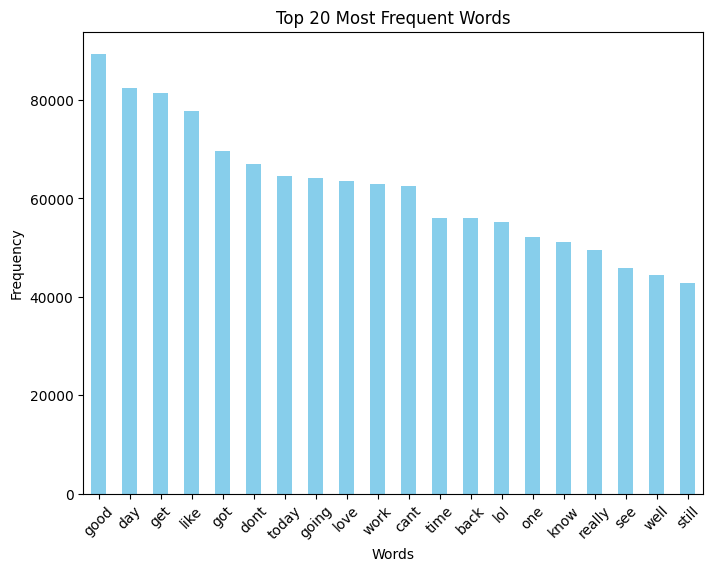

In [13]:
plt.figure(figsize=(8,6))
word_freq.plot(kind='bar',color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


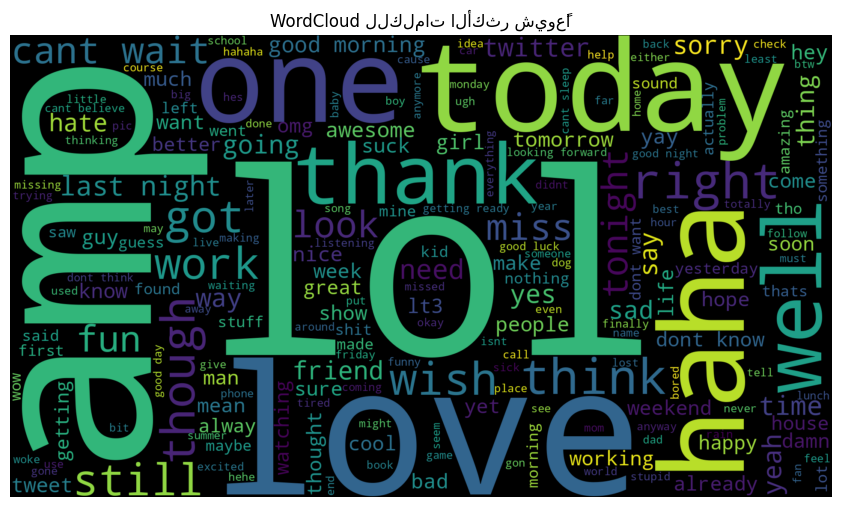

In [29]:
wordcloud = WordCloud(width=1920,height=1080,background_color='black').generate(' '.join(words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud للكلمات الأكثر شيوعًا')
plt.show()

In [31]:
wordcloud.to_file('twitter_words.png')

In [32]:
from google.colab import files
files.download('twitter_words.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

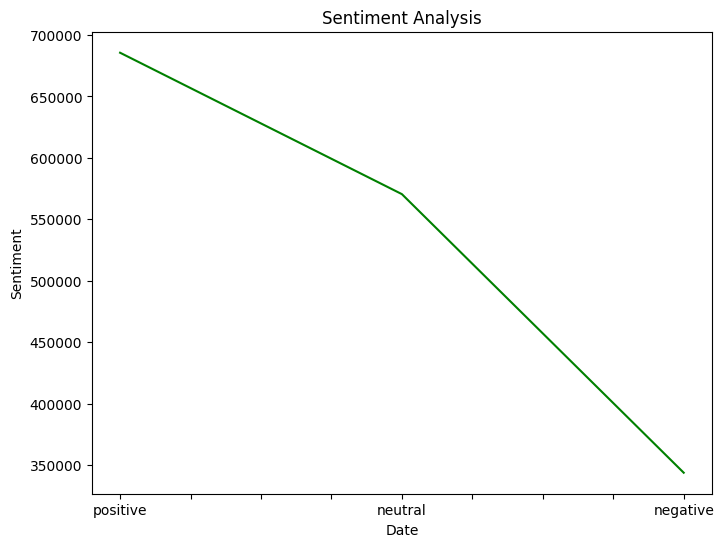

In [33]:
plt.figure(figsize=(8,6))
sentiment_counts.plot(x=data['date'],y=data['sentiment'],color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

In [34]:
data.head()

,target,ids,date,flag,user,text,cleaned_text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot a thats a bummer you shoulda got...,neutral
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,neutral
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,positive
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,negative
